<a href="https://www.kaggle.com/code/josephfaster/analysis-for-zuber-simulation?scriptVersionId=147019729" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# DATA ANALYSIS FOR ZUBER (SIMULATION)

# INDICE

1. [Introduction](#Introduction)
2. [Import libraries and data](#Import-libraries-and-data)
3. [EDA](#EDA)
    - 3.1[Brief description of the first records](#Biref-description-of-the-first-records)
    - 3.2[Analysis of taxi companies](#Analysis-of-taxi-companies)
    - 3.3[Neighborhood analysis](#Neighborhood-analysis)
    
4. [Hypothesis testing](#Hypothesis-testing)
   - 4.1[Statement of the Hypotheses](#Statement-of-the-Hypotheses)
   - 4.2[Detailed Analysis of Statistics and Variances in Hypothesis Testing](#Detailed-Analysis-of-Statistics-and-Variances-in-Hypothesis-Testing)
   
       - 4.2.1[Descriptive Statistics](#Descriptive-Statistics)
       
   - 4.3 [Test Hypotesis Testing](#Test-Hypotesis-Testing)
   - 4.4 [Conclusion](#Conclusion)
   
5. [Conclusions and Considerations](#Conclusions-and-Considerations)

<a id="Introduction"></a>
## Introduction
**Project Context:**
In today's digital age, ridesharing has revolutionized the way people get around cities. Chicago, being one of the largest and busiest cities in the United States, is a potentially lucrative market for these companies.

**About Zuber:**
Zuber is a new ride-sharing startup that plans to launch its operations in Chicago. Unlike traditional taxi companies, Zuber wants to use the power of data to better understand the needs and preferences of its customers.

**Analysis Objective:**
As a Zuber analyst, my primary goal is to analyze available data to discover patterns and trends regarding ridesharing in Chicago. I want to explore things like passenger preferences, popular neighborhoods for trips, and how external factors such as weather can influence the length and number of trips. These findings will not only help Zuber make informed decisions in their launch strategy, but will also provide them with a competitive advantage in the market.




<a id="Import-librares-and-data"></a>

## Import libraries and data

In [1]:
#Import libraries and display data
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import difflib
import re
import numpy as np
from scipy import stats


In [2]:
# Importing the CSV files
data_companies = pd.read_csv('/kaggle/input/moved-project-sql-result-01-csv/moved_project_sql_result_01.csv')
data_neighborhoods = pd.read_csv('/kaggle/input/moved-project-sql-result-04-csv/moved_project_sql_result_04.csv')

<a id="EDA"></a>
## EDA

In [3]:
# Showing the first rows of each dataset for an overview
data_companies_head = data_companies.head()
data_neighborhoods_head = data_neighborhoods.head()

display(data_companies_head)
display(data_neighborhoods_head)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<a id="Biref-description-of-the-first-records"></a>

### **Brief description of the first records:**

**Data from taxi companies**:
- Flash Cab made 19,558 trips.
- Taxi Affiliation Services made 11,422 trips.
- Medallion Leasin made 10,367 trips.
- ... (and other records).

**Neighborhood data**:
- In the "Loop" neighborhood, the average number of trips in November 2017 was approximately 10,727.
- In "River North", the average was 9,523.
- In "Streeterville", the average was 6,664.
- ... (and other records).


Now, let's study the data in it and make sure the data types are correct.



In [4]:
# Reviewing the general information of each dataset
data_companies_info = data_companies.info()
data_neighborhoods_info = data_neighborhoods.info()

display(data_companies_info)
display(data_neighborhoods_info)

# Check for duplicate values in both datasets
companies_duplicates = data_companies.duplicated().sum()
neighborhoods_duplicates = data_neighborhoods.duplicated().sum()

print(f"Duplicate values in the companies dataset: {companies_duplicates}")
print(f"Duplicate values in the neighborhood dataset: {neighborhoods_duplicates}")

# Descriptive statistics for the numeric columns of both datasets
print("\nDescriptive statistics for the companies dataset:")
display(data_companies.describe())
print("\nDescriptive statistics for the neighborhood dataset:")
display(data_neighborhoods.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

None

Duplicate values in the companies dataset: 0
Duplicate values in the neighborhood dataset: 0

Descriptive statistics for the companies dataset:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000



Descriptive statistics for the neighborhood dataset:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


**General Information Review:**

- **Dataset of companies (`data_companies`)**:
   * Contains 64 records and 2 columns.
   * The columns are: `company_name` (object type) and `trips_amount` (integer type).

- **Neighborhoods dataset (`data_neighborhoods`)**:
   * Contains 94 records and 2 columns.
   * The columns are: `dropoff_location_name` (object type) and `average_trips` (float type).

**Duplicates:**

Both datasets do not contain duplicate values, indicating that the information is unique for each record.

**Descriptive Statistics:**

- **Dataset of companies (`data_companies`)**:
   * The average `trips_amount` is 2145.48 trips.
   * The median is 178.5 trips.
   * The standard deviation is high, indicating considerable variability in the data, with a value of 3812.31.
   * The range of `trips_amount` is from 2 to 19558 trips.

- **Neighborhoods dataset (`data_neighborhoods`)**:
   * The average `average_trips` is 599.95 trips.
   * The median is 52.02 trips.
   * The standard deviation is 1714.59, showing high variability in the data.
   * The range of `average_trips` is from 1.8 to 10727.47 trips.
 

**Next, I will identify the top 10 neighborhoods in terms of tour completion.**

In [5]:
# Selecting the top 10 neighborhoods in terms of tour completion
top_10_neighborhoods = data_neighborhoods.sort_values(by="average_trips", ascending=False).head(10)
top_10_neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


The top 10 neighborhoods in terms of tour completion in November 2017 are:

1. **Loop**: 10,727.47 trips on average
2. **River North**: 9,523.67 trips on average
3. **Streeterville**: 6,664.67 trips on average
4. **West Loop**: 5,163.67 trips on average
5. **O'Hare**: 2,546.90 trips on average
6. **Lake View**: 2,420.97 trips on average
7. **Grant Park**: 2,068.53 trips on average
8. **Museum Campus**: 1,510.00 trips on average
9. **Gold Coast**: 1,364.23 trips on average
10. **Sheffield & DePaul**: 1,259.77 trips on average


I'll make the graphs for taxi companies and number of trips, as well as for the top 10 neighborhoods by number of completions.

<a id="Analysis-of-taxi-companies"></a>

### **Analysis of taxi companies**:

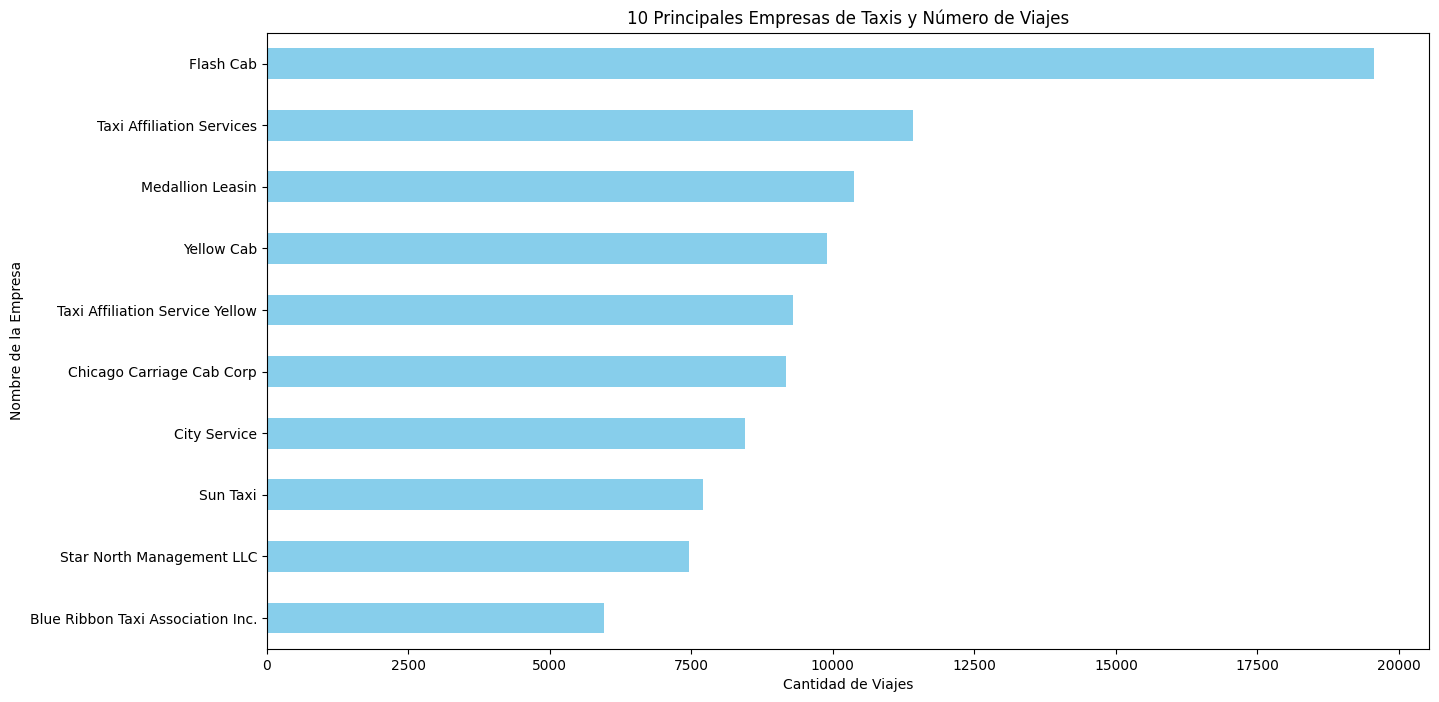

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [6]:
# Chart for top 10 taxi companies and number of trips
plt.figure(figsize=(15, 8))
data_companies.sort_values(by="trips_amount", ascending=False).head(10).set_index("company_name").sort_values(by="trips_amount").plot(kind="barh", legend=False, color="skyblue", ax=plt.gca())
plt.title("10 Principales Empresas de Taxis y Número de Viajes")
plt.ylabel("Nombre de la Empresa")
plt.xlabel("Cantidad de Viajes")
plt.show()

display(data_companies.sort_values(by="trips_amount", ascending=False).head(10))

1. **Taxi Companies and Number of Trips**: It can be seen that there is a clear difference between the first companies in terms of trips made and the others. Specifically, the companies "Flash Cab", "Taxi Affiliation Services" and "Medallion Leasin" are leading in number of trips.
  

<a id="Neighborhood-analysis"></a>

### **Neighborhood analysis**:

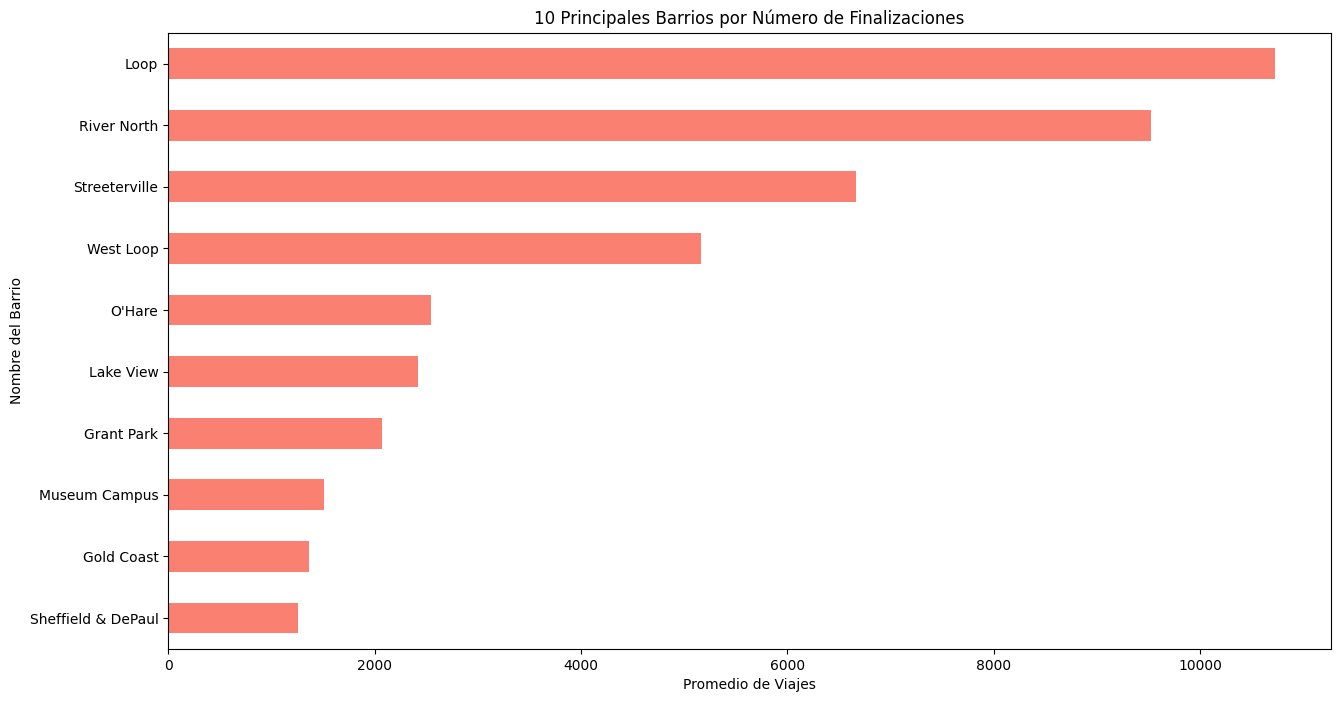

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [7]:
# Chart for top 10 neighborhoods by number of completions
plt.figure(figsize=(15, 8))
top_10_neighborhoods.set_index("dropoff_location_name").sort_values(by="average_trips").plot(kind="barh", legend=False, color="salmon", ax=plt.gca())
plt.title("10 Principales Barrios por Número de Finalizaciones")
plt.ylabel("Nombre del Barrio")
plt.xlabel("Promedio de Viajes")
plt.show()

display(top_10_neighborhoods)

1. **Top 10 Neighborhoods by Number of Completions**: “Loop” and “River North” are clearly the most popular neighborhoods in terms of trip completions. They are followed by "Streeterville" and "West Loop", but with significantly fewer completions compared to the first two.



<a id="Hypothesis-testing"></a>

## Hypothesis testing

In [8]:
#Importing the CSV file
data_loop_to_ohare = pd.read_csv('/kaggle/input/moved-project-sql-result-07-csv/moved_project_sql_result_07.csv')
# Showing the first rows of the dataset for an overview
data_loop_to_ohare_head = data_loop_to_ohare.head()
data_loop_to_ohare_head

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


We can see that the data set contains information about:

- `start_ts`: date and time of collection.
- `weather_conditions`: weather conditions at the time the trip started.
- `duration_seconds`: trip duration in seconds.

To test the hypothesis that "The average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays," we need to perform the following steps:

1. We will propose the null and alternative hypotheses.
2. We will separate the data into two groups: rainy Saturdays and Saturdays with good weather.
3. We will perform a hypothesis test to determine if there is a significant difference between the means of the two groups.







<a id="Statement-of-the-Hypotheses"></a>

### **Statement of the Hypotheses**:
- **Null hypothesis (\( H_0 \))**: The average trip duration from the Loop to O'Hare International Airport does not change on rainy Saturdays.
- **Alternative Hypothesis (\( H_1 \))**: The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays.

We are going to separate the data into two groups and then perform the hypothesis test.


In [9]:
# Showing the first rows of the dataset for an overview
data_loop_to_ohare_head = data_loop_to_ohare.head()
display(data_loop_to_ohare_head)

# Statement of the Hypotheses:
# Null Hypothesis (H0): The average trip length from the Loop to O'Hare International Airport does not change on rainy Saturdays.
# Alternative Hypothesis (H1): The average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays.

# Filtering the data to only get trips that occurred on a Saturday
data_loop_to_ohare['start_ts'] = pd.to_datetime(data_loop_to_ohare['start_ts'])
saturdays_data = data_loop_to_ohare[data_loop_to_ohare['start_ts'].dt.weekday == 5]

# Separating the data into two groups: rainy Saturdays and Saturdays with good weather
rainy_saturdays = saturdays_data[saturdays_data['weather_conditions'] == 'Bad']['duration_seconds']
good_weather_saturdays = saturdays_data[saturdays_data['weather_conditions'] == 'Good']['duration_seconds']

# Statistical description of the duration of the trips for the two groups
display(rainy_saturdays.describe())
display(good_weather_saturdays.describe())




,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Here is a statistical overview of the trip lengths for the two groups:

**Rainy Saturdays**:
- Number of trips: 180
- Average duration: 2427.2 seconds (approximately 40.5 minutes)
- Standard deviation: 721.3 seconds

**Saturdays with Good Weather**:
- Number of trips: 888
- Average duration: 1999.7 seconds (approximately 33.3 minutes)
- Standard deviation: 759.2 seconds

From a preview, it appears there is a difference in average trip length between the two groups. However, to determine if this difference is statistically significant, we will perform a hypothesis test.

We will use the Student t test for independent samples, since we are comparing the means of two different groups. For the test, we will set a significance level (alpha) of 0.05.

<a id="Detaildes-Analysis-of-Statistics-and-variance-in-Hypothesis-Testing"></a>

### Detailed Analysis of Statistics and Variances in Hypothesis Testing

A continuación, se presenta un análisis más detallado de las estadísticas descriptivas y las varianzas en los dos grupos de la prueba de hipótesis sobre la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en sábados lluviosos y con buen tiempo.

Rainy Saturday Statistics:


count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

Statistics for Saturdays with good weather:


count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

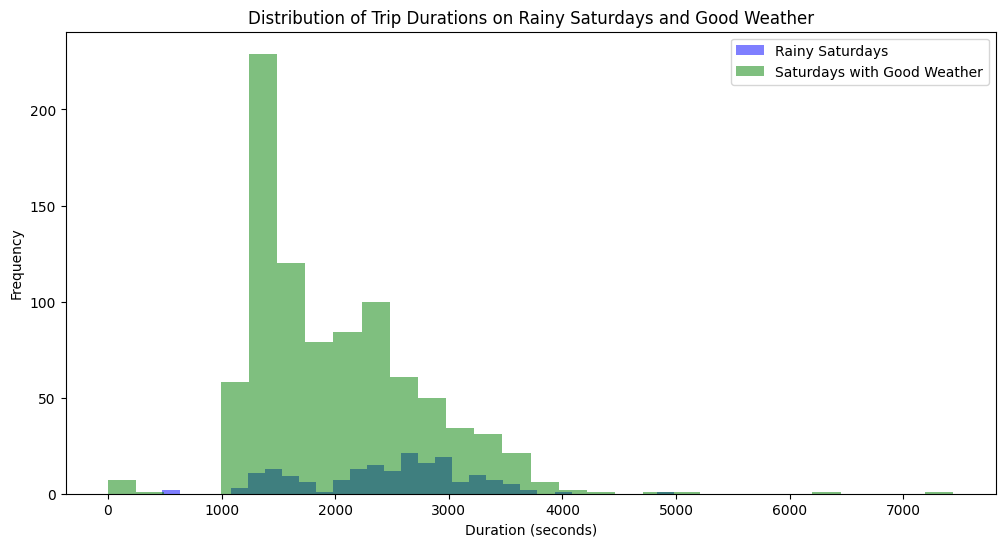

p value for Levene's test: 0.5332038671974493
There is no significant evidence of differences in variances.


In [10]:
# Statistical description of the duration of the trips for the two groups
print("Rainy Saturday Statistics:")
display(rainy_saturdays.describe())

print("Statistics for Saturdays with good weather:")
display(good_weather_saturdays.describe())

# Display of the distribution of trip durations for the two groups
plt.figure(figsize=(12, 6))
plt.hist(rainy_saturdays, bins=30, alpha=0.5, label='Rainy Saturdays', color='blue')
plt.hist(good_weather_saturdays, bins=30, alpha=0.5, label='Saturdays with Good Weather', color='green')
plt.title('Distribution of Trip Durations on Rainy Saturdays and Good Weather')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Test for homogeneity of variances (Levene's test)
_, levene_p_value = stats.levene(rainy_saturdays, good_weather_saturdays)
print(f"p value for Levene's test: {levene_p_value}")

# Comment on homogeneity of variances
if levene_p_value > 0.05:
    print("There is no significant evidence of differences in variances.")
else:
    print("There is significant evidence of differences in variances.")


<a id="Descriptive-Statistics"></a>

#### Descriptive Statistics

**Rainy Saturdays:**
- Number of trips: 180
- Average duration: 2427.21 seconds (approximately 40.5 minutes)
- Standard deviation: 721.31 seconds
- Minimum: 480 seconds
- 25th percentile: 1962 seconds
- Median: 2540 seconds
- 75th percentile: 2928 seconds
- Maximum: 4980 seconds

**Saturdays with Good Weather:**
- Number of trips: 888
- Average duration: 1999.68 seconds (approximately 33.3 minutes)
- Standard deviation: 759.20 seconds
- Minimum: 0 seconds
- 25th percentile: 1389.75 seconds
- Median: 1800 seconds
- 75th percentile: 2460 seconds
- Maximum: 7440 seconds

**Test of Homogeneity of Variances (Levene's Test)**

The value \( p \) for Levene's test is 0.53, indicating that there is no significant evidence of differences in the variances between rainy and good-weather Saturdays. This result strengthens the validity of the Student's t test for independent samples performed later.

<a id="Test-Hypotesis-Testing"></a>
### Test Hypothesis Testing


After performing an exhaustive analysis of the descriptive statistics and variances, I will proceed to perform the hypothesis test using the Student t test for independent samples.

The results are the following:

In [11]:
# Performing the Student t test for independent samples
t_stat, p_value = stats.ttest_ind(rainy_saturdays, good_weather_saturdays, equal_var=False)

t_stat, p_value


(7.186034288068629, 6.738994326108734e-12)

- **Statistical (t):** 7,186
- **Value (p):** \(6.74 \times 10^{-12}\)

Since the value \(p\) is significantly lower than our significance level (\(\alpha = 0.05\)), we reject the null hypothesis. This suggests that there is a significant difference in average trip duration between rainy Saturdays and good weather Saturdays.

This finding supports the idea that weather conditions, specifically rainfall, have an impact on trip times from the Loop to O'Hare International Airport on Saturdays. The next section will explore the practical implications of this result and provide recommendations based on the analysis performed.



<a id="Conclusion"></a>

### Conclusion:
The average trip length from the Loop to O'Hare International Airport changes significantly on rainy Saturdays compared to good weather Saturdays.

To explain the approach:
- We propose the null hypothesis (\(H_0\)) assuming that there is no difference in the average duration of trips between the two groups (rainy Saturdays vs. Saturdays with good weather).
- We propose the alternative hypothesis (\( H_1 \)) suggesting that there is a difference.
- We use the Student t test for independent samples because we are comparing the means of two different groups and we do not know if the variances are equal (hence the `equal_var=False` option).
- We chose a significance level of 0.05 because it is a value commonly used in statistical practice to determine significance.

<a id="Conclusions-and-Considerations"></a>
## Conclusions and Considerations

**Taxi Companies:**

The companies "Flash Cab", "Taxi Affiliation Services" and "Medallion Leasin" clearly dominate the market in terms of the number of trips made. These companies could have a greater presence in key areas, a more effective marketing strategy, or greater reliability among customers. For further analysis, it would be beneficial to examine the specific strategies implemented by these leading companies, if the information is available.

**Neighborhoods and Demands:**

Neighborhoods such as "Loop" and "River North" record the highest number of trip completions, possibly indicating their status as commercial, tourist centers, or high-density residential areas. To optimize services, taxi companies could consider concentrating a greater number of vehicles in these neighborhoods, especially during peak hours or special events, to maximize their income.

**Influence of Climate:**

The hypothesis test confirmed that there is a significant difference in the average trip duration between rainy Saturdays and good weather Saturdays. Specifically, trips tend to be longer on rainy Saturdays. Given this finding, taxi companies could consider informing customers about possible delays during rainy days, adjust fares based on weather conditions, and explore alternative routes to minimize delays on bad weather days.

In summary, taxi companies in Chicago can optimize their operations by considering these key variables: the presence and strategies of leading companies, high-demand areas in the city, and weather conditions. These factors influence the duration of trips and demand for services, and their proper consideration can lead to more efficient and profitable operations.
In summary, taxi companies in Chicago can optimize their operations by considering these key variables: the presence and strategies of leading companies, high-demand areas in the city, and weather conditions. These factors influence the duration of trips and demand for services, and their proper consideration can lead to more efficient and profitable operations.
